### Name:-Prachi Balaji Upare
### Roll no.:-2447053
### Batch:-C
### Practical No.2:-
Predict the price of the Uber ride from a given pickup point to the agreed drop-off
location. Perform following tasks:
1. Pre-process the dataset.
2. Identify outliers.
3. Check the correlation.
4. Implement linear regression and ridge, Lasso regression models.
5. Evaluate the models and compare their respective scores like R2, RMSE, etc.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score , accuracy_score
from sklearn.preprocessing import StandardScaler

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
price=pd.read_csv("uber.csv")
price.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [3]:
price.tail()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1
199999,11951496,2010-05-15 04:08:00.00000076,14.1,2010-05-15 04:08:00 UTC,-73.984395,40.720077,-73.985508,40.768793,1


In [4]:
price.shape

(200000, 9)

In [5]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [6]:
price.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [7]:
price.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [8]:
price.drop(['Unnamed: 0', 'key'], axis=1, inplace=True)

In [9]:
price= price.dropna()

In [10]:
price.loc[:, 'pickup_datetime'] = pd.to_datetime(price['pickup_datetime'])

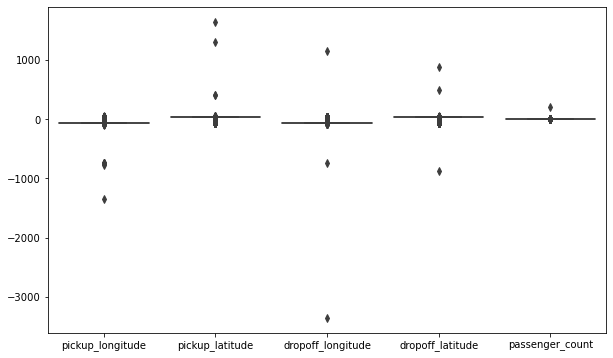

In [11]:
features = price[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']]
plt.figure(figsize=(10, 6))
sns.boxplot(data=features)
plt.show()

In [12]:
# Define a function to remove outliers using the IQR method
def remove_outliers(price, column):
    Q1 = price[column].quantile(0.25)
    Q3 = price[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return price[(price[column] >= lower_bound) & (price[column] <= upper_bound)]

# Apply the function to the dataset
# You may choose relevant columns for outlier removal
columns_to_check = ['fare_amount', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']
data_cleaned = price.copy()

for column in columns_to_check:
    data_cleaned = remove_outliers(data_cleaned, column)

# Check the shape of the dataset before and after outlier removal
print("Original dataset shape:", price.shape)
print("Cleaned dataset shape:", data_cleaned.shape)


Original dataset shape: (199999, 7)
Cleaned dataset shape: (148074, 7)


In [13]:
features1 = data_cleaned[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']]
target = data_cleaned['fare_amount']

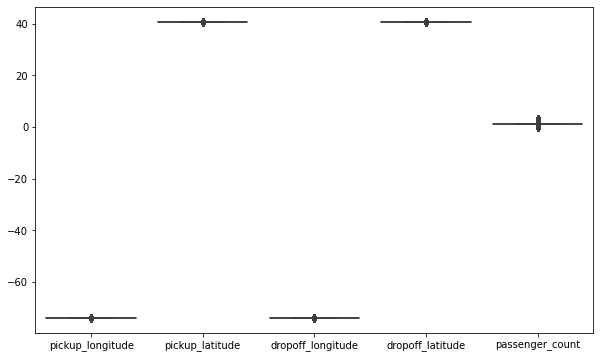

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=features1)
plt.show()

Non-numeric columns to be handled: Index(['pickup_datetime'], dtype='object')


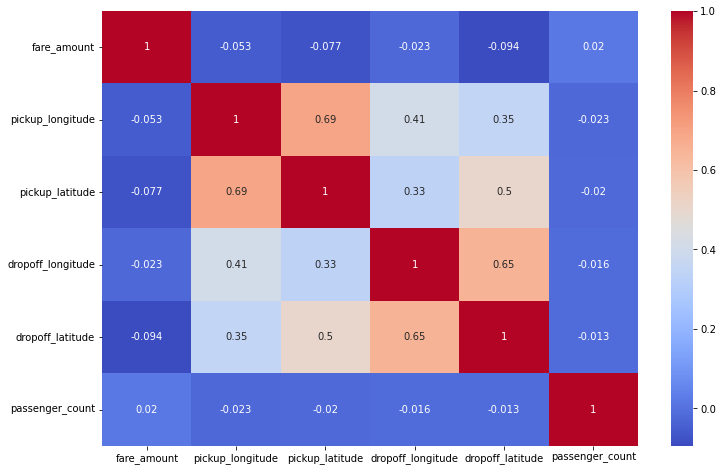

In [15]:
# Check for non-numeric columns
non_numeric_cols = data_cleaned.select_dtypes(exclude=[np.number]).columns
print("Non-numeric columns to be handled:", non_numeric_cols)

# Drop non-numeric columns for correlation calculation
data_numeric = data_cleaned.select_dtypes(include=[np.number])

# Correlation matrix
correlation_matrix = data_numeric.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [16]:
x_train, x_test, y_train, y_test = train_test_split(features1, target, test_size=0.2, random_state=1)

In [17]:
#  Standardizing the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [18]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)
y_pred_linear = reg.predict(x_test)

In [19]:
# Implement Lasso Regression
from sklearn.linear_model import Lasso
lasso_regressor = Lasso(alpha=0.1)
lasso_regressor.fit(x_train, y_train)
y_pred_lasso = lasso_regressor.predict(x_test)

In [20]:
from sklearn.linear_model import Ridge
ridge_regressor = Ridge(alpha=1.0)
ridge_regressor.fit(x_train, y_train)
y_pred_ridge = ridge_regressor.predict(x_test)

In [21]:
def evaluate_model(y_test, y_pred):
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return rmse, mae, r2

In [22]:
linear_rmse, linear_mae, linear_r2 = evaluate_model(y_test, y_pred_linear)
ridge_rmse, ridge_mae, ridge_r2 = evaluate_model(y_test, y_pred_ridge)
lasso_rmse, lasso_mae, lasso_r2 = evaluate_model(y_test, y_pred_lasso)

In [23]:
# Print evaluation metrics
print("Linear Regression: RMSE =", linear_rmse, ", MAE =", linear_mae, ", R2 =", linear_r2)
print("Ridge Regression: RMSE =", ridge_rmse, ", MAE =", ridge_mae, ", R2 =", ridge_r2)
print("Lasso Regression: RMSE =", lasso_rmse, ", MAE =", lasso_mae, ", R2 =", lasso_r2)

Linear Regression: RMSE = 3.8594370797217596 , MAE = 3.045059075903016 , R2 = 0.014211456591583405
Ridge Regression: RMSE = 3.8594371385986386 , MAE = 3.0450591056667116 , R2 = 0.014211426514579073
Lasso Regression: RMSE = 3.868414471121768 , MAE = 3.0520198734203325 , R2 = 0.009620060422640964
